In [315]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [317]:
sales = pd.read_excel('9 - Superstore.xls', index_col= False)
#rounding all values till 2 after coma
sales = sales.round(2)
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1434,CA-2014-120768,2014-12-19,2014-12-21,Second Class,IM-15070,Irene Maddox,Consumer,United States,Florence,...,35630,South,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,1819.86,10004,1.5,163.79
1,1712,CA-2017-123491,2017-10-30,2017-11-05,Standard Class,JK-15205,Jamie Kunitz,Consumer,United States,San Francisco,...,94122,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",1702.12,14,1.2,510.64
2,7388,CA-2016-105732,2016-09-13,2016-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,...,68104,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",1336.44,14,0.0,387.57
3,8936,CA-2017-130036,2017-08-27,2017-08-27,Same Day,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,19120,East,TEC-AC-10001908,Technology,Accessories,Logitech Wireless Headset h800,1119.89,14,0.2,209.98
4,2794,CA-2014-154599,2014-04-12,2014-04-17,Standard Class,KN-16450,Kean Nguyen,Corporate,United States,Redondo Beach,...,90278,West,TEC-PH-10001557,Technology,Phones,Pyle PMP37LED,1075.09,14,0.2,94.07


In [318]:
sales.shape

(9994, 21)

Checking all columns names

In [319]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Looking for zeros missing values

In [320]:
na_cols = sales.isna().sum()
na_cols

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name    14
Segment          12
Country           0
City              9
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales            11
Quantity          0
Discount          0
Profit            0
dtype: int64

In [321]:
null_cols = sales.isnull().sum()
null_cols[null_cols > 0]

Customer Name    14
Segment          12
City              9
Sales            11
dtype: int64

In [322]:
#checking missing values in 'Customer Name'
null_displ = sales[(sales['Customer Name'].isnull()==True)]
null_displ = null_displ[['Customer ID','Customer Name', 'Segment', 'City', 'Sales']]
null_displ.head()

,Customer ID,Customer Name,Segment,City,Sales
254,ZC-21910,NaN,Consumer,Houston,431.93
556,VG-21790,NaN,Consumer,San Francisco,119.62
1607,VG-21790,NaN,Consumer,San Mateo,75.18
1921,ZC-21910,NaN,Consumer,Miami,1363.96
1930,ZC-21910,NaN,Consumer,Edmonds,1298.55


In [323]:
#searching by customer ID for missing names
sales[sales['Customer ID'] =='ZC-21910']
sales.loc[(sales['Customer ID']=='ZC-21910') & (sales['Customer Name'].isna()), 'Customer Name'] = 'Zuschuss Carroll'
sales[sales['Customer ID'] =='VG-21790']
sales.loc[(sales['Customer ID']=='VG-21790') & (sales['Customer Name'].isna()), 'Customer Name'] = 'Vivek Gonzalez'
sales[sales['Customer ID'] =='VG-21805']
sales.loc[(sales['Customer ID']=='VG-21805') & (sales['Customer Name'].isna()), 'Customer Name'] = 'Vivek Grady'



In [324]:
#checking segment for missing values
null_displ = sales[(sales['Segment'].isnull()==True)]
null_displ = null_displ[['Customer Name', 'Segment', 'City', 'Sales']]
null_displ.head()

,Customer Name,Segment,City,Sales
989,Valerie Takahito,NaN,Philadelphia,98.11
1379,Vicky Freymann,NaN,Elmhurst,634.12
2956,Valerie Takahito,NaN,NaN,14.85
3234,Valerie Takahito,NaN,Philadelphia,563.81
3240,Valerie Takahito,NaN,NaN,547.14


In [325]:
#adding missing segments to customers
sales.loc[(sales['Customer Name']=='Valerie Takahito') & (sales['Segment'].isna()), 'Segment'] = 'Home Office'
sales.loc[(sales['Customer Name']=='Vicky Freymann') & (sales['Segment'].isna()), 'Segment'] = 'Home Office'


In [326]:
#filling missing values in City column by finding clients
null_displ = sales[(sales['City'].isnull()==True)]
null_displ = null_displ[['Customer Name', 'Segment', 'City', 'Sales']]
null_displ

,Customer Name,Segment,City,Sales
2892,Victor Preis,Home Office,NaN,19.00
2956,Valerie Takahito,Home Office,NaN,14.85
3240,Valerie Takahito,Home Office,NaN,547.14
3621,Victor Preis,Home Office,NaN,83.56
3899,Vicky Freymann,Home Office,NaN,28.16
4461,Victor Preis,Home Office,NaN,546.06
4760,Victor Preis,Home Office,NaN,269.49
7761,Valerie Takahito,Home Office,NaN,41.99
9735,Vicky Freymann,Home Office,NaN,6.48


Filtering clients by name to find their citys

In [327]:
##update specific city value in the data by customer name

sales.loc[(sales['Customer Name']=='Valerie Takahito') & (sales['City'].isna()), 'City'] = 'Philadelphia'
sales.loc[(sales['Customer Name']=='Vicky Freymann') & (sales['City'].isna()) & (sales['Postal Code'] == 90045), 'City'] = 'Los Angeles'
sales.loc[(sales['Customer Name']=='Vicky Freymann') & (sales['City'].isna()) & (sales['Postal Code'] == 47201), 'City'] = 'Columbus'
sales.loc[(sales['Customer Name']=='Victor Preis') & (sales['City'].isna()) & (sales['Postal Code'] == 10011), 'City'] = 'New York'
sales.loc[(sales['Customer Name']=='Victor Preis') & (sales['City'].isna()) & (sales['Postal Code'] == 48310), 'City'] = 'Sterling Heights'

In [328]:
#filling sales missing column with 0
null_displ = sales[(sales['Sales'].isnull()==True)]
null_displ = null_displ[['Customer Name', 'Segment', 'City', 'Sales']]
null_displ.head()
sales['Sales'] = sales['Sales'].fillna(0)

In [329]:
#rechecking if missing value issue is solved
null_cols = sales.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [330]:
null_displ = sales[(sales['Customer Name'].isnull()==True)]
null_displ = null_displ[['Customer ID','Customer Name', 'Segment', 'City', 'Sales']]
null_displ.head()

,Customer ID,Customer Name,Segment,City,Sales


### Searching for repeatable values and duplicates

In [331]:
#part for repeatable values
low_variance = [] #creating a list to contain the names of columns

for col in sales._get_numeric_data(): #loop through all numeric values
    minimum = np.min(sales[col]) #takes the min 
    ninety_perc = np.percentile(sales[col], 90) #takes the 90th percentile
    if ninety_perc == minimum: #if they are equal it means that 90% of values are the same
     low_variance.append(col) #appends name of this columns

print(low_variance) #not found

[]


In [332]:
#searching for duplicates
duplicat = sales.duplicated(keep=False)
len(duplicat)

for row in duplicat.keys():
    if row == True:
        print(row, duplicat[row])

1 False


No duplicates revealed, so no need to drop them 

In [333]:
#duplicat = duplicat.drop_duplicates()
#len(duplicat)

### Finding outliers

In [334]:
#looking on specific sub category of sales item to find data inconsistency
machine = sales[sales['Sub-Category'] =='Machines']
machine[['Sales', 'Quantity', 'Profit']]

,Sales,Quantity,Profit
82,1704.89,11,767.20
90,369.16,11,32.30
114,2396.40,10,179.73
206,1188.00,9,-950.40
428,0.00,8,-1359.99
...,...,...,...
9135,265.48,1,-111.50
9261,91.48,1,-1.83
9306,69.99,1,30.10
9603,12.59,1,-18.04


In [336]:
#checking numeric values in our data
round(sales.describe()[['Sales', 'Quantity', 'Discount','Profit']], 2)

,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00
mean,221.43,4.79,0.16,28.66
std,570.69,100.06,0.21,234.26
min,0.00,1.00,0.00,-6599.98
25%,17.14,2.00,0.00,1.73
50%,54.08,3.00,0.20,8.66
75%,209.59,5.00,0.20,29.36
max,22638.48,10004.00,1.50,8399.98


In [337]:
#visualization for 'Sales' outliers
fig_sales = px.box(sales, y='Sales')
fig_sales.show()

In [338]:
#visualization for 'Profit' outliers
fig_profit = px.box(sales, y='Profit')
fig_profit.show()

In [339]:
#visualization for 'Quantity' outliers
fig_quantity = px.box(sales, y='Quantity')
fig_quantity.show()

In [340]:
#finding outliers values in the tab

outliers = sales[
    (sales['Quantity'] > 15) | #more than 15 pieces
    (sales['Sales'] >= 5500) | #that is more than 5500 cost of sales
    (sales['Profit'] < -3900 ) | #profit less than 3000 or more than 4000
    (sales['Profit'] > 5100 ) ]

ready_to_drop = outliers[['Customer ID', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']]
round(ready_to_drop, 2)

,Customer ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,IM-15070,Furniture,Chairs,1819.86,10004,1.5,163.79
29,AB-10105,Office Supplies,Binders,9892.74,13,0.0,4946.37
1291,SM-20320,Technology,Machines,22638.48,6,0.5,-1811.08
1863,TC-20980,Technology,Copiers,17499.95,5,0.0,8399.98
1869,CS-12505,Technology,Machines,4499.99,5,0.7,-6599.98
3093,RB-19360,Technology,Copiers,13999.96,4,0.0,6719.98
3094,TA-21385,Technology,Copiers,11199.97,4,0.2,3919.99
4284,HL-15040,Technology,Copiers,10499.97,3,0.0,5039.99


In [341]:
#searching for anomalies by client1 from outliers who made our profit fall to -6599 by one purchase
machines = sales[sales['Customer ID'] =='CS-12505']
round(machines[['Customer ID', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']], 2)

,Customer ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
1064,CS-12505,Office Supplies,Supplies,52.14,7,0.2,5.87
1766,CS-12505,Office Supplies,Paper,25.68,6,0.0,11.56
1869,CS-12505,Technology,Machines,4499.99,5,0.7,-6599.98
2325,CS-12505,Office Supplies,Appliances,168.10,5,0.0,43.71
2896,CS-12505,Office Supplies,Labels,18.75,5,0.0,9.00
3304,CS-12505,Technology,Machines,396.00,4,0.0,190.08
5411,CS-12505,Technology,Accessories,59.98,3,0.2,12.00
6262,CS-12505,Office Supplies,Paper,12.84,3,0.0,5.78
6840,CS-12505,Office Supplies,Binders,456.59,2,0.7,-304.39


In [342]:
#searching for anomalies by client2 from outliers who bought 10 004 chairs for 1 819$
chairs = sales[sales['Customer ID'] =='IM-15070']
round(chairs[['Customer ID', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']], 2)

,Customer ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,IM-15070,Furniture,Chairs,1819.86,10004,1.5,163.79
356,IM-15070,Furniture,Furnishings,52.42,9,0.2,15.07
1522,IM-15070,Office Supplies,Binders,152.76,6,0.0,74.85
2148,IM-15070,Furniture,Tables,364.95,5,0.5,-248.17
2171,IM-15070,Office Supplies,Storage,324.90,5,0.0,38.99
2589,IM-15070,Furniture,Furnishings,54.92,5,0.2,10.98
2900,IM-15070,Office Supplies,Labels,18.45,5,0.0,8.67
2993,IM-15070,Office Supplies,Art,13.12,5,0.2,1.15
3141,IM-15070,Technology,Phones,1099.96,4,0.0,285.99
3538,IM-15070,Office Supplies,Labels,122.12,4,0.0,56.18


<AxesSubplot:>

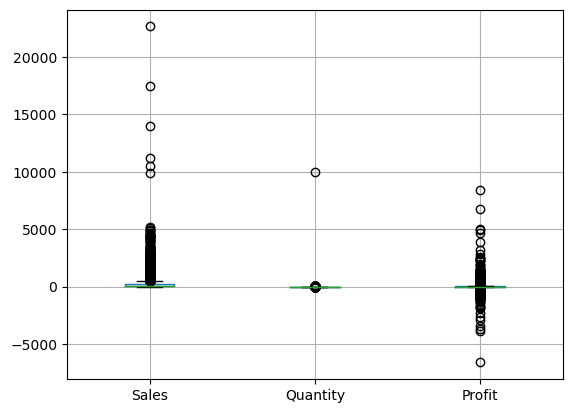

In [343]:
#plotting a graph with all 3 outliers together
%matplotlib inline
numeric_col = ['Sales', 'Quantity', 'Profit']
sales.boxplot(numeric_col)


After analyzing the data of outliers, no logical explanation for this anomalies were deteted, so we took in considerations, that it was type error that corrupts our data and we decided to remove 8 rows with a significant difference of almost two times from normal data. 

In [344]:
#deleting rows with outliers by zeros
sales.drop([0, 29, 1291, 1863], axis = 0, inplace=True )
sales.drop([1869, 3093, 3094, 4286], axis = 0, inplace=True)

In [345]:
stats = sales.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
round(stats, 2)

,count,mean,std,min,25%,50%,75%,max,IQR
Row ID,9986.0,4996.86,2885.12,1.00,2498.25,4996.50,7493.75,9994.00,4995.50
Postal Code,9986.0,55194.11,32066.88,1040.00,23223.00,56831.50,90008.00,99301.00,66785.00
Sales,9986.0,212.98,448.60,0.00,17.12,53.94,208.37,10499.97,191.25
Quantity,9986.0,3.79,2.22,1.00,2.00,3.00,5.00,14.00,3.00
Discount,9986.0,0.16,0.21,0.00,0.00,0.20,0.20,1.20,0.20
Profit,9986.0,26.94,185.67,-3839.99,1.73,8.64,29.34,5039.99,27.61


## Bins for profit measure

In [346]:
# creating a list of labels to assing to bin
profit_labels = ['Very low', 'Low', 'Moderate', 'High', 'Very High']


bins = pd.qcut(sales['Profit'], 5, labels = profit_labels)
bins.head(10)

1     Very High
2     Very High
3     Very High
4     Very High
5     Very High
6      Very low
7     Very High
8     Very High
9     Very High
10    Very High
Name: Profit, dtype: category
Categories (5, object): ['Very low' < 'Low' < 'Moderate' < 'High' < 'Very High']

In [347]:
#add bins to dataframe
sales = pd.concat([sales, bins], axis = 1) #axis indicates the column
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit
1,1712,CA-2017-123491,2017-10-30,2017-11-05,Standard Class,JK-15205,Jamie Kunitz,Consumer,United States,San Francisco,...,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",1702.12,14,1.2,510.64,Very High
2,7388,CA-2016-105732,2016-09-13,2016-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,...,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",1336.44,14,0.0,387.57,Very High
3,8936,CA-2017-130036,2017-08-27,2017-08-27,Same Day,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,East,TEC-AC-10001908,Technology,Accessories,Logitech Wireless Headset h800,1119.89,14,0.2,209.98,Very High
4,2794,CA-2014-154599,2014-04-12,2014-04-17,Standard Class,KN-16450,Kean Nguyen,Corporate,United States,Redondo Beach,...,West,TEC-PH-10001557,Technology,Phones,Pyle PMP37LED,1075.09,14,0.2,94.07,Very High
5,6132,CA-2014-163447,2014-12-27,2014-12-31,Standard Class,TB-21190,Thomas Brumley,Home Office,United States,New York City,...,East,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",767.21,14,0.1,161.97,Very High


### Some calculation

In [349]:
#finding the mean of all sub category numeric values
round(sales.groupby(['Category','Sub-Category'])['Sales', 'Quantity', 'Discount', 'Profit'].mean(), 2)


C:\Users\user\AppData\Local\Temp\ipykernel_15008\1478115573.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Sales  Quantity  Discount  Profit
Category        Sub-Category                                     
Furniture       Bookcases      503.86      3.81      0.21  -15.23
                Chairs         530.24      3.80      0.17   42.90
                Furnishings     95.83      3.72      0.14   13.65
                Tables         648.79      3.89      0.26  -55.57
Office Supplies Appliances     230.76      3.71      0.17   38.92
                Art             34.07      3.77      0.07    8.20
                Binders        110.28      3.92      0.37   15.54
                Envelopes       64.87      3.57      0.08   27.42
                Fasteners       13.94      4.21      0.08    4.38
                Labels          34.30      3.85      0.07   15.24
                Paper           57.28      3.78      0.07   24.86
                Storage        264.59      3.73      0.07   25.15
                Supplies       202.56      3.41      0.08   -6.26
Technology      Accessories    215.97      3.84      0.08   54.11
                Copiers       1431.20      3.40      0.17  562.74
                Machines      1071.60      3.80      0.30  104.39
                Phones         371.21      3.70      0.15   50.07

In [351]:
#total of profits and sales for all our categories of sales
round(sales.pivot_table(index=["Sub-Category"], values=["Sales",'Profit'], aggfunc=np.sum), 2)

,Profit,Sales
Sub-Category,,
Accessories,41936.73,167380.31
Appliances,18137.97,107532.14
Art,6527.77,27118.80
Binders,23630.70,167735.17
Bookcases,-3472.58,114879.97
Chairs,26426.31,326629.23
Copiers,36577.92,93028.24
Envelopes,6964.00,16476.38
Fasteners,949.52,3024.25


In [360]:
#finding top 10 sales items
top_10 = sales.groupby( 'Sub-Category')[['Sales']].agg('max').sort_values(['Sales'], ascending=False)
top_10.head(10)

,Sales
Sub-Category,
Copiers,10499.97
Machines,5199.96
Binders,5083.96
Supplies,4912.59
Phones,4548.81
Chairs,4416.17
Bookcases,4404.90
Tables,4297.64
Accessories,3347.37


In [362]:
#finding 10 most loyal clients
best_10 = sales.groupby( 'Customer Name', )[['Sales']].agg('count').sort_values(['Sales'], ascending=False)
best_10.head(10)

,Sales
Customer Name,
William Brown,37
Matt Abelman,34
John Lee,34
Paul Prost,34
Chloris Kastensmidt,32
Edward Hooks,32
Jonathan Doherty,32
Seth Vernon,32
Zuschuss Carroll,31


Time to export clean data into csv file

In [363]:
sales.to_csv('sales_clean.csv', index=False)